In [340]:
import numpy as np 
import pandas as pd

In [341]:
df=pd.read_csv('./spam.csv',encoding='latin')

In [342]:
df.sample(6)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1208,ham,Also maaaan are you missing out,NaN,NaN,NaN
3329,ham,Send me yetty's number pls.,NaN,NaN,NaN
3085,ham,I wish that I was with you. Holding you tightl...,NaN,NaN,NaN
2016,ham,"Princess, is your kitty shaved or natural?",NaN,NaN,NaN
1441,ham,Ya:)going for restaurant..,NaN,NaN,NaN
1652,spam,For ur chance to win a å£250 cash every wk TXT...,NaN,NaN,NaN


In [343]:
df.shape 

(5572, 5)

In [344]:
#1. Data cleaning
#2. EDA
#3. Text Preprocessing 
#4. Model building
#5. Evaluation
#6. Improvement
#7. Website 
#8. Deploy

1 Data CLeaning

In [345]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [346]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [347]:
df.sample(7)

,v1,v2
2242,ham,Nope wif my sis lor... Aft bathing my dog then...
1516,ham,I need to come home and give you some good lov...
2365,ham,Ok try to do week end course in coimbatore.
59,ham,Yes..gauti and sehwag out of odi series.
2253,ham,Lol enjoy role playing much?
2238,ham,Think you sent the text to the home phone. Tha...
4264,ham,&lt;DECIMAL&gt; m but its not a common car he...


In [349]:
#renaming the column 
df.rename(columns={'v1':'target','v2':'text'},inplace=True)


In [350]:
df.sample(4)

,target,text
1737,ham,I cant pick the phone right now. Pls send a me...
1493,ham,How are you with moneY...as in to you...money ...
614,ham,I called and said all to him:)then he have to ...
3404,ham,"Jus chillaxin, what up"


In [351]:
from sklearn.preprocessing import LabelEncoder 
encoder=LabelEncoder()
encoder.fit_transform(df['target'])


array([0, 0, 1, ..., 0, 0, 0])

In [352]:
df['target']=encoder.fit_transform(df['target'])

In [353]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [354]:
#missing values 
df.isnull().sum()

target    0
text      0
dtype: int64

In [355]:
#check for duplicate values
df.duplicated().sum()

403

In [356]:
#remove duplicates
df=df.drop_duplicates(keep="first")

In [357]:
df.duplicated().sum()

0

In [358]:
df.shape 

(5169, 2)

2.EDA 

In [359]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [360]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

In [361]:
import matplotlib.pyplot as plt 

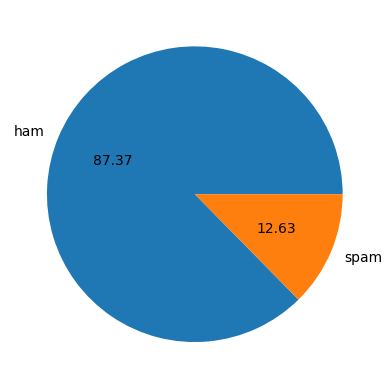

In [266]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [267]:
#data is imbalanced

In [362]:
import nltk

In [363]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [364]:
df['num_characters']=df['text'].apply(len)

In [365]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [366]:
#num of words
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [367]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [368]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [369]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [276]:
#ham 
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [370]:
#spam
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [371]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

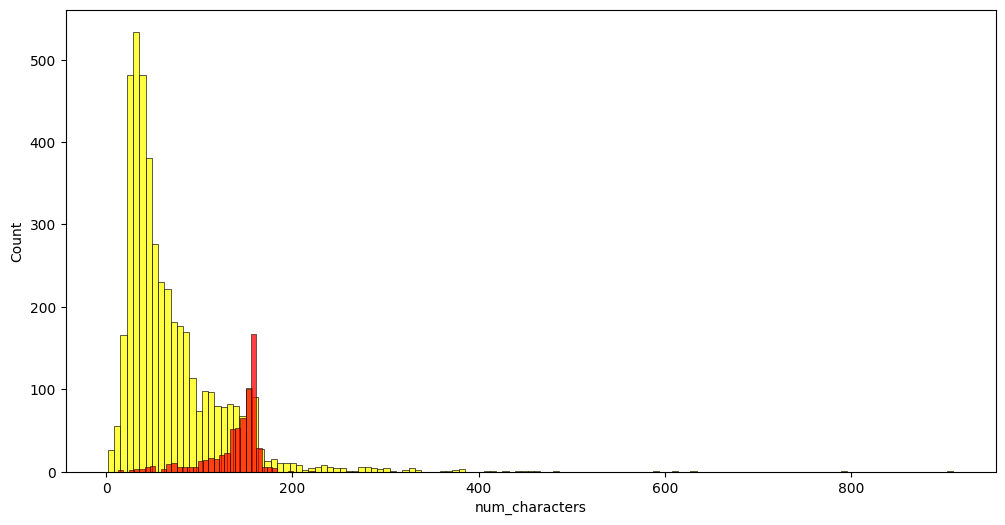

In [372]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_characters'],color='yellow')
sns.histplot(df[df['target']==1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

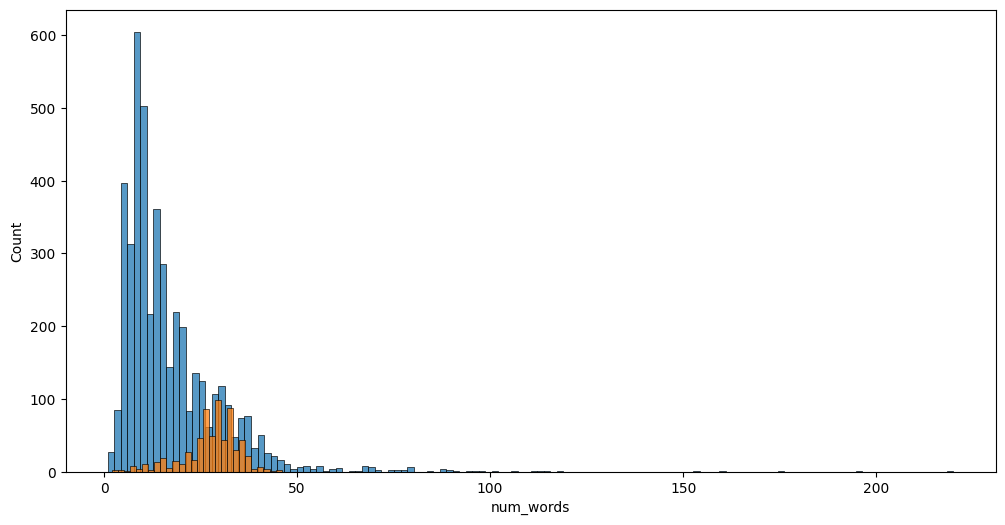

In [373]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'])


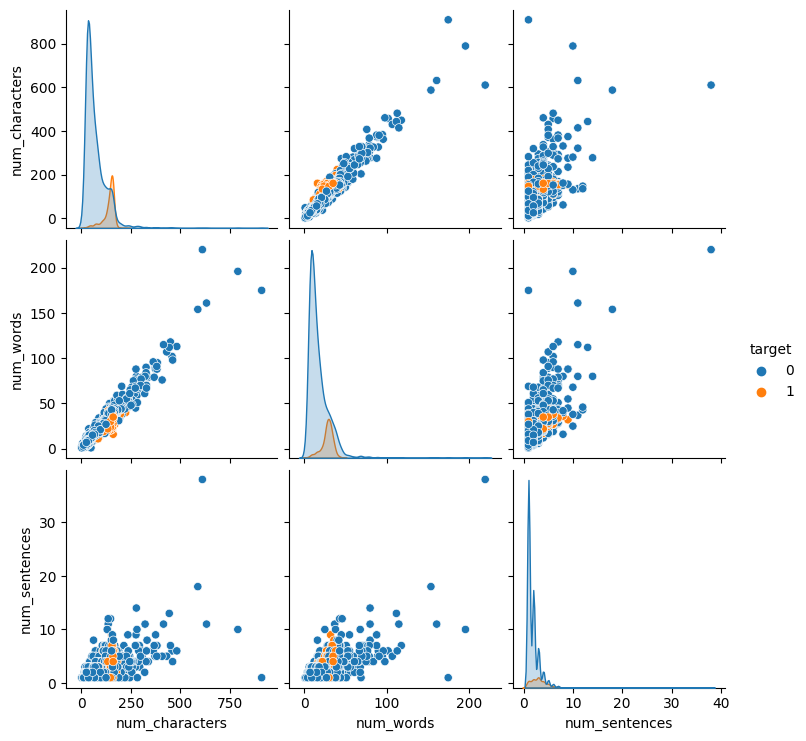

In [374]:
sns.pairplot(df,hue='target')

C:\Users\hp\AppData\Local\Temp\ipykernel_11972\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

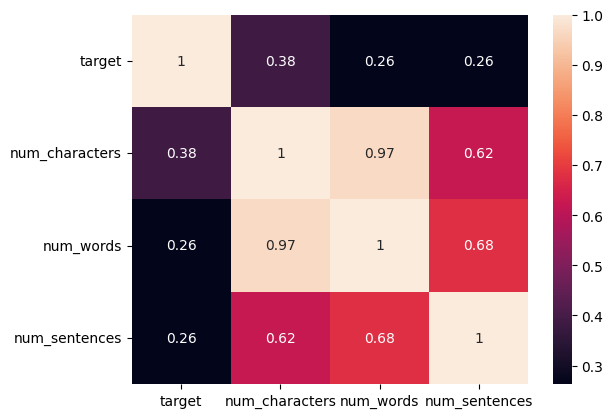

In [280]:
sns.heatmap(df.corr(),annot=True)

3. Data Preprocessing
 -->Lower case
 -->Tokenization
 -->Removing special characters
 -->Removing stop words and punctuation

In [375]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer 
import string 
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:] 
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        ps=PorterStemmer()
        y.append(ps.stem(i))        
    return " ".join(y)            

In [126]:
transform_text("'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...")

'jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [376]:
df['transformed_text']=df['text'].apply(transform_text)

In [377]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [378]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [379]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=""))

<Figure size 1200x500 with 0 Axes>

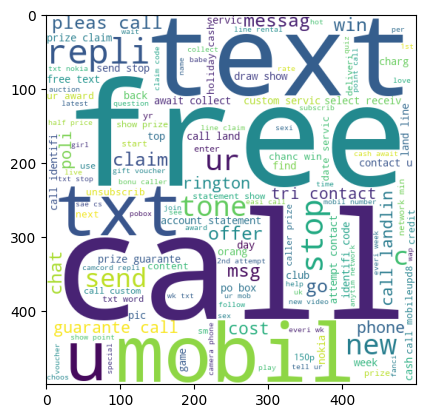

<Figure size 1200x500 with 0 Axes>

In [380]:
plt.imshow(spam_wc)
plt.figure(figsize=(12,5))

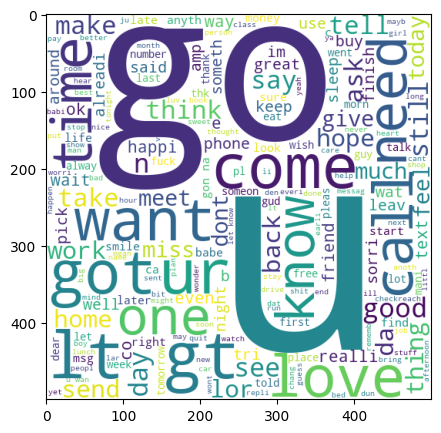

In [381]:
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=''))
plt.figure(figsize=(12,5))
plt.imshow(ham_wc)
plt.show()

In [382]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [383]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [384]:
len(spam_corpus)

9939

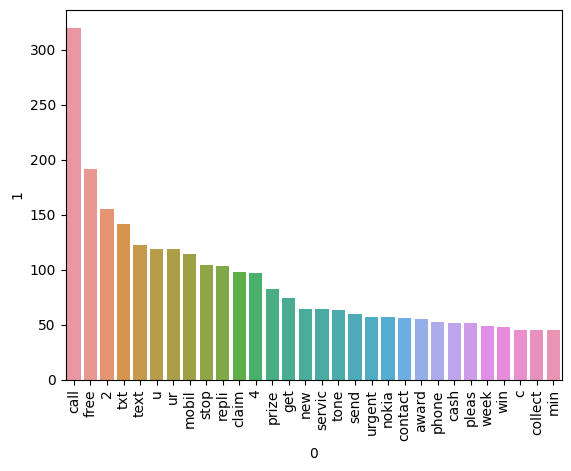

In [385]:
from collections import Counter 
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation="vertical")
plt.show()

In [386]:
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

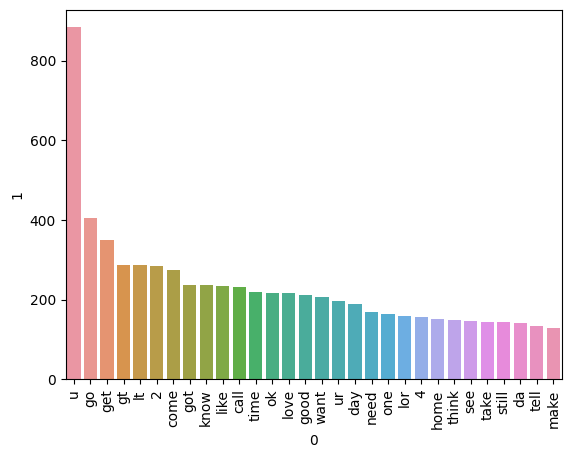

In [387]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation="vertical")
plt.show() 

Model Building

In [388]:
from sklearn.feature_extraction.text import CountVectorizer ,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

In [389]:
x=tfidf.fit_transform(df['transformed_text']).toarray()

In [390]:
# from sklearn.preprocessing import MinMaxScaler 
# scaler=MinMaxScaler()
# x=scaler.fit_transform(x)


In [391]:
# x=np.hstack((x,df['num_characters'].values.reshape(-1,1)))

In [392]:
x.shape 

(5169, 3000)

In [393]:
y=df['target'].values 

In [394]:
y 

array([0, 0, 1, ..., 0, 0, 0])

In [395]:
from sklearn.model_selection import train_test_split 

In [396]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [425]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB 
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix 

In [426]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [427]:
gnb.fit(X_train,Y_train)

GaussianNB()

In [428]:
Y_pred=gnb.predict(X_test)


In [429]:
print(accuracy_score(Y_test,Y_pred))
print(precision_score(Y_test,Y_pred))
print(confusion_matrix(Y_test,Y_pred))

0.8694390715667312
0.5068493150684932
[[788 108]
 [ 27 111]]


In [430]:
mnb.fit(X_train,Y_train)
Y_pred1=mnb.predict(X_test)
print(accuracy_score(Y_test,Y_pred1))
print(precision_score(Y_test,Y_pred1))
print(confusion_matrix(Y_test,Y_pred1))

0.9709864603481625
1.0
[[896   0]
 [ 30 108]]


In [403]:
bnb.fit(X_train,Y_train)
Y_pred2=bnb.predict(X_test)
print(accuracy_score(Y_test,Y_pred2))
print(precision_score(Y_test,Y_pred2))
print(confusion_matrix(Y_test,Y_pred2))

0.9835589941972921
0.991869918699187
[[895   1]
 [ 16 122]]


In [404]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [405]:
svc=SVC(kernel='sigmoid',gamma=1.0)
knc=KNeighborsClassifier()
mnb=MultinomialNB()
dtc=DecisionTreeClassifier(max_depth=5)
lrc=LogisticRegression(solver='liblinear',penalty='l1')
rfc=RandomForestClassifier(n_estimators=50,random_state=2)
abc=AdaBoostClassifier(n_estimators=50,random_state=2)
bc=BaggingClassifier(n_estimators=50,random_state=2)
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt=GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb=XGBClassifier(n_estimators=50,random_state=2)

In [406]:
clfs={
    'SVC':svc,
    'KN':knc,
    'NB':mnb,
    'DT':dtc,
    'LR':lrc,
    'RF':rfc,
    'AdaBoost':abc,
    'BgC':bc,
    'ETC':etc,
    'GDBT':gbdt,
    'xgb':xgb
    
}

In [407]:
def train_classifier(clf,x_train,y_train,x_test,y_test):
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test)
    accuracy=accuracy_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)
    return accuracy,precision

In [408]:
train_classifier(svc,X_train,Y_train,X_test,Y_test)

(0.9758220502901354, 0.9747899159663865)

In [409]:
Accuracy_scores=[]
Precision_scores=[]
for name,clf in clfs.items():
    current_accuracy,current_precision=train_classifier(clf,X_train,Y_train,X_test,Y_test)
    print("For",name)
    print("Accuracy-",current_accuracy)
    print("Precision-",current_precision)
    
    Accuracy_scores.append(current_accuracy)
    Precision_scores.append(current_precision)

For SVC
Accuracy- 0.9758220502901354
Precision- 0.9747899159663865
For KN
Accuracy- 0.9052224371373307
Precision- 1.0
For NB
Accuracy- 0.9709864603481625
Precision- 1.0
For DT
Accuracy- 0.9303675048355899
Precision- 0.8173076923076923
For LR
Accuracy- 0.9584139264990329
Precision- 0.9702970297029703
For RF
Accuracy- 0.9758220502901354
Precision- 0.9829059829059829
For AdaBoost
Accuracy- 0.960348162475822
Precision- 0.9292035398230089
For BgC
Accuracy- 0.9584139264990329
Precision- 0.8682170542635659
For ETC
Accuracy- 0.9748549323017408
Precision- 0.9745762711864406
For GDBT
Accuracy- 0.9468085106382979
Precision- 0.9191919191919192
For xgb
Accuracy- 0.9671179883945842
Precision- 0.9262295081967213


In [413]:
performance_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_Scores':Accuracy_scores,'Precision_Scores':Precision_scores}).sort_values('Precision_Scores',ascending=False)

In [414]:
performance_df

,Algorithm,Accuracy_Scores,Precision_Scores
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
6,AdaBoost,0.960348,0.929204
10,xgb,0.967118,0.926230
9,GDBT,0.946809,0.919192
7,BgC,0.958414,0.868217


In [415]:
performance_df1=pd.melt(performance_df,id_vars='Algorithm')

In [416]:
performance_df1


,Algorithm,variable,value
0,KN,Accuracy_Scores,0.905222
1,NB,Accuracy_Scores,0.970986
2,RF,Accuracy_Scores,0.975822
3,SVC,Accuracy_Scores,0.975822
4,ETC,Accuracy_Scores,0.974855
5,LR,Accuracy_Scores,0.958414
6,AdaBoost,Accuracy_Scores,0.960348
7,xgb,Accuracy_Scores,0.967118
8,GDBT,Accuracy_Scores,0.946809
9,BgC,Accuracy_Scores,0.958414


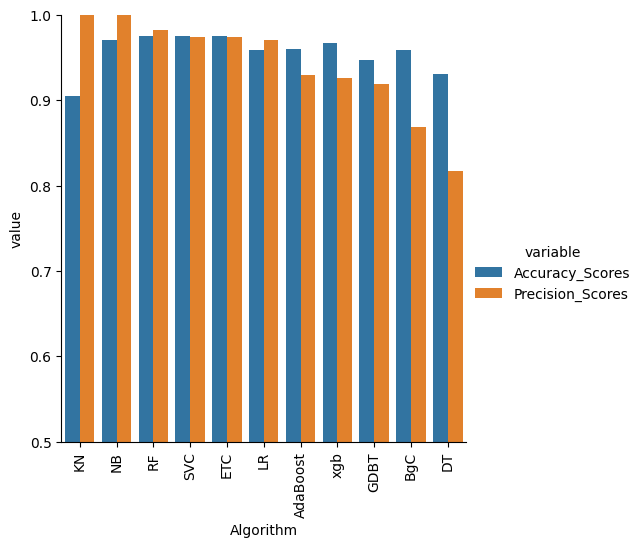

In [417]:
sns.catplot(x='Algorithm',y='value',hue='variable',data=performance_df1,kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()


In [418]:
newdf=performance_df.merge(temp_df)

In [419]:
newdf

,Algorithm,Accuracy_Scores,Precision_Scores,Accuracy_Scores_numchr,Precision_Scores_numchr
0,KN,0.905222,1.000000,0.934236,0.830189
1,NB,0.970986,1.000000,0.941006,1.000000
2,RF,0.975822,0.982906,0.969052,0.981818
3,SVC,0.975822,0.974790,0.866538,0.000000
4,ETC,0.974855,0.974576,0.978723,0.975410
5,LR,0.958414,0.970297,0.961315,0.962264
6,AdaBoost,0.960348,0.929204,0.964217,0.931624
7,xgb,0.967118,0.926230,0.969052,0.941667
8,GDBT,0.946809,0.919192,0.950677,0.930693
9,BgC,0.958414,0.868217,0.966151,0.899225


In [420]:
#voting classifier 
svc=SVC(kernel='sigmoid',gamma=1.0,probability=True)
mnb=MultinomialNB()
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)

In [421]:
from sklearn.ensemble import VotingClassifier 


In [422]:
voting=VotingClassifier(estimators=[('svm',svc),('nb',mnb),('et',etc)],voting='soft')

In [423]:
voting.fit(X_train,Y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [331]:
Y_pred=voting.predict(X_test)

In [332]:
print("Accuracy",accuracy_score(Y_test,Y_pred))
print("Precision",precision_score(Y_test,Y_pred))

Accuracy 0.941972920696325
Precision 1.0


In [333]:
#Applying Stacking 
estimators=[('svm',svc),('nb',mnb),('et',etc)]
final_estimator=RandomForestClassifier()

In [334]:
from sklearn.ensemble import StackingClassifier 

In [335]:
clf=StackingClassifier(estimators=estimators,final_estimator=final_estimator)

In [339]:
clf.fit(X_train,Y_train)
y_pred=clf.predict(X_test)
print('Accuracy',accuracy_score(Y_test,Y_pred))
print('Precision',precision_score(Y_test,Y_pred))

Accuracy 0.941972920696325
Precision 1.0


In [431]:

import pickle 
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))